In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [7]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [9]:
    print(f'Train Data: {data_train.shape}\nTest Data: {data_test.shape}')


Train Data: (7352, 563)
Test Data: (2947, 563)


In [11]:
print("Train Data Sütun Sayısı: ", data_train.shape[0])
print("Train Data Satır Sayısı: ", data_train.shape[1])
print("Test Data Sütun Sayısı: ", data_test.shape[0])
print("Test Data Satır Sayısı: ", data_test.shape[1])

Train Data Sütun Sayısı:  7352
Train Data Satır Sayısı:  563
Test Data Sütun Sayısı:  2947
Test Data Satır Sayısı:  563


In [13]:
#DataFrame'de tüm Satırların gözükmesi için kullandım
pd.set_option("display.max_columns", None)

#Eksik veri kontrolü yapıyorum görüldüğü üzere null değer yok
df = df = pd.read_csv("test.csv")
print("\nEksik Veri Sayısı:\n", df.isnull().sum())



Eksik Veri Sayısı:
 tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [15]:
# veri setinde her bir satır için tekrarlanan verilerin olup olmadığını kontrol ediyorum.
data_train.duplicated().any()


False

In [17]:
# Aynı işlemi sütunları satır gibi okumak için Transpoze alıp kontrol ediyorum.
duplicated_columns = data_train.columns[data_train.T.duplicated()].tolist()
len(duplicated_columns)

21

In [18]:
# axis = 0 satır axis = 1 sütunları ifade ediyor tekrar eden sütunları çıkarıp yazdırıyorum
data_train = data_train.drop(duplicated_columns, axis = 1)
data_train.shape

(7352, 542)

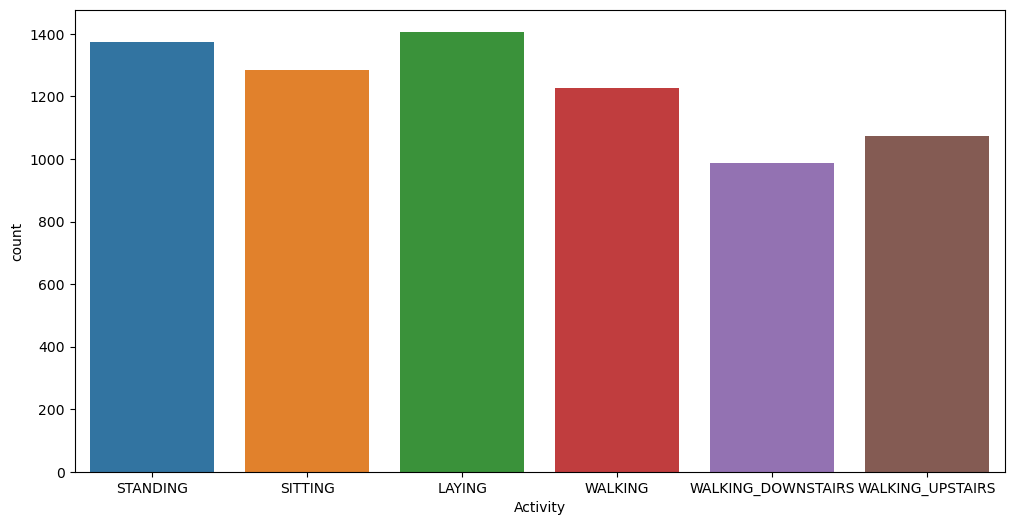

In [21]:
#veri setinde activity'de bulunan kategorilerin kaç defa tekrar ettiğini gösteren grafiği çizdiriyorum

plt.figure(figsize=(12,6))
axis=sns.countplot(x="Activity",data=data_train, hue="Activity")
plt.xticks(x=data_train['Activity'])
plt.show()

C:\Users\musta\AppData\Local\Temp\ipykernel_7980\2749033223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Activity", y="tBodyAcc-mean()-X", data=data_train, palette="Set3")


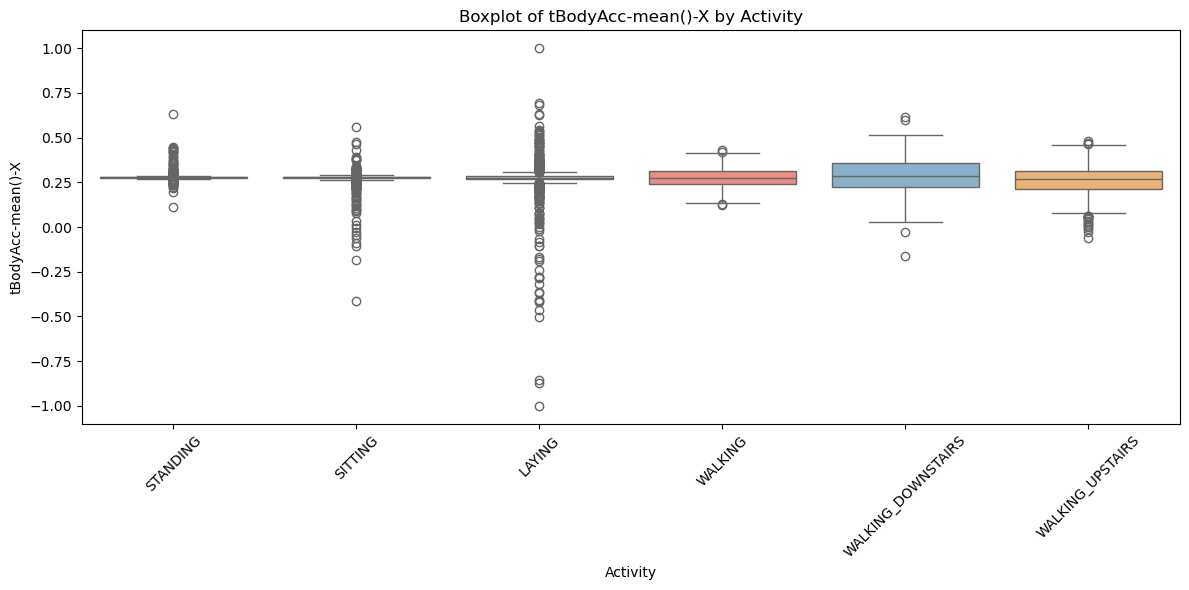

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Activity", y="tBodyAcc-mean()-X", data=data_train, palette="Set3")
plt.title("Boxplot of tBodyAcc-mean()-X by Activity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [58]:
# Mak.Ögr. Algoritmaları ile analiz yapacağımız için veri setini features ve target olarak ayırıyoruz
# X' te Activity Sütunu çıkarıldı y'de ise sadece activity bulunuyor, features'i kullanarak tahminleme yapacağız
X = data_train.drop('Activity', axis = 1)
y = data_train['Activity']
y

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [59]:
# Kategorik verileri sayısal değerlere dönüştürüyoruz fit ile değer atayıp transform ile çeviriyoruz.
lbl = LabelEncoder()
y = lbl.fit_transform(y)
y

array([2, 2, 2, ..., 5, 5, 5])

In [60]:
#X: Özellikler (features). Girdi verileri, modelin tahmin yapmayı öğreneceği sütunlar.
#y: Hedef değişken (labels). Modelin tahmin etmeye çalıştığı kategoriler veya değerler.
# Veri setinin % 20'si test setine %80'i  eğitim setine ayırdık
# Random state ile her çalıştırmada veri seinin aynı şekilde bölüneceğini garanti ettik.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

In [61]:
#iterasyon'la alakalı bir hata döndürüyor ancak bizi etkileyen birşey yok
#logReg = LogisticRegression() → Logistic Regression modeli oluşturur.
#logReg.fit(X_train, y_train) → Modeli eğitim verileriyle eğitir.
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

/Users/mustafaince/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
#y_prediction1 = logReg.predict(X_test) → Test verileriyle tahmin yapar.
#accuracy_score(y_test, y_prediction1) → Test setindeki gerçek etiketler ile tahmin edilen etiketlerin doğruluğunu hesaplar.
#accuracy_score = Doğru Tahmin Sayısı / Toplam Örnek
y_prediction1 = logReg.predict(X_test)
accuracy_score(y_test,y_prediction1)

0.9782460910944936

In [63]:
scaler = StandardScaler()
numeric_columns = data_train.select_dtypes(include=['float64', 'int64']).columns
data_train[numeric_columns] = scaler.fit_transform(data_train[numeric_columns])

print(data_train.head())

# Standartlaştırılma yaptığım veri seti burada
data_train.to_csv('standardized_test.csv', index=False)

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.200642          -0.063683          -0.419628         -0.868814   
1           0.055948           0.031486          -0.253908         -0.875426   
2           0.073515          -0.043416          -0.076295         -0.869039   
3           0.066696          -0.208422          -0.249712         -0.870626   
4           0.030469           0.027587          -0.109848         -0.875188   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.939441         -0.737529         -0.859817         -0.939019   
1         -0.923902         -0.849304         -0.868531         -0.921998   
2         -0.907760         -0.893785         -0.863137         -0.898854   
3         -0.940022         -0.921805         -0.864503         -0.938124   
4         -0.934878         -0.921343         -0.867384         -0.931789   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y 

In [64]:
# Mak.Ögr. Algoritmaları ile analiz yapacağımız için veri setini features ve target olarak ayırıyoruz
# X' te Activity Sütunu çıkarıldı y'de ise sadece activity bulunuyor, features'i kullanarak tahminleme yapacağız
X = data_train.drop('Activity', axis = 1)
y = data_train['Activity']
y

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [65]:
# Kategorik verileri sayısal değerlere dönüştürüyoruz fit ile değer atayıp transform ile çeviriyoruz.
lbl = LabelEncoder()
y = lbl.fit_transform(y)
y

array([2, 2, 2, ..., 5, 5, 5])

In [66]:
#X: Özellikler (features). Girdi verileri, modelin tahmin yapmayı öğreneceği sütunlar.
#y: Hedef değişken (labels). Modelin tahmin etmeye çalıştığı kategoriler veya değerler.
# Veri setinin % 20'si test setine %80'i  eğitim setine ayırdık
# Random state ile her çalıştırmada veri seinin aynı şekilde bölüneceğini garanti ettik.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

In [67]:
#iterasyon'la alakalı bir hata döndürüyor ancak bizi etkileyen birşey yok
#logReg = LogisticRegression() → Logistic Regression modeli oluşturur.
#logReg.fit(X_train, y_train) → Modeli eğitim verileriyle eğitir.
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

/Users/mustafaince/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
#y_prediction1 = logReg.predict(X_test) → Test verileriyle tahmin yapar.
#accuracy_score(y_test, y_prediction1) → Test setindeki gerçek etiketler ile tahmin edilen etiketlerin doğruluğunu hesaplar.
#accuracy_score = Doğru Tahmin Sayısı / Toplam Örnek
y_prediction1 = logReg.predict(X_test)
accuracy_score(y_test,y_prediction1)

0.9830047586675731

In [69]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
y_prediction2 = rf.predict(X_test)
accuracy_score(y_test,y_prediction2)

0.981645139360979

Confusion Matrix, without normalization


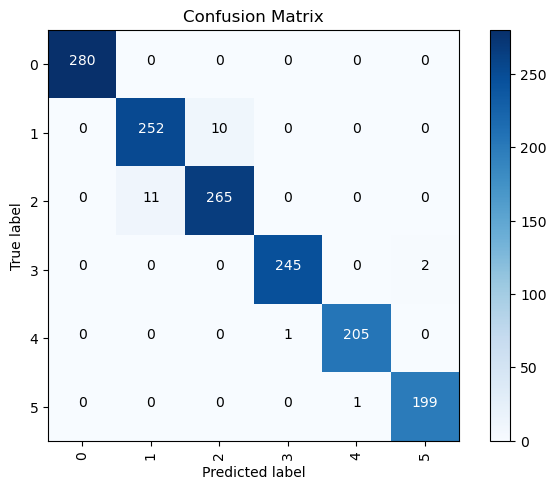

In [71]:
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    Confusion Matrix'i çizmek ve görselleştirmek için bir fonksiyon.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without normalization")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Test verisinin gerçek etiketleri ve modelin tahminleri
y_true = y_test  # Gerçek sınıf etiketleri
y_pred = logReg.predict(X_test)  # Logistic Regression modeli tahminleri

# Confusion Matrix oluştur
cm = confusion_matrix(y_true, y_pred)

# Sınıf etiketlerini ayarla
class_names = logReg.classes_  # Modelin sınıf etiketleri

# Confusion Matrix'i çiz
plot_confusion_matrix(cm, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show() 

In [72]:
from datetime import datetime
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, 
                  print_cm=True, cm_cmap=plt.cm.Greens):
    """
    Modeli eğitme, test etme, metrikleri hesaplama ve sonuçları görselleştirme fonksiyonu.
    """
    # Sonuçları saklamak için bir sözlük
    results = dict()
    
    # Modelin eğitimi
    train_start_time = datetime.now()
    print('Model eğitiliyor...')
    model.fit(X_train, y_train)
    print('Eğitim tamamlandı. \n')
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print('Eğitim süresi (HH:MM:SS.ms): {}\n'.format(results['training_time']))
    
    # Test veri setinde tahmin yapma
    print('Test verisi tahmin ediliyor...')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Tahmin tamamlandı. \n')
    results['testing_time'] = test_end_time - test_start_time
    print('Test süresi (HH:MM:SS.ms): {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred

    # Model doğruluğunu hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Doğruluk      |')
    print('---------------------')
    print('\n    {}\n'.format(accuracy))
    
    # Confusion Matrix oluşturma
    cm = confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n{}'.format(cm))
        
    # Confusion Matrix görselleştirme
    plt.figure(figsize=(8, 8))
    plt.grid(False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=cm_normalize, 
                          title='Normalized Confusion Matrix', cmap=cm_cmap)
    plt.show()
    
    # Classification Report oluşturma
    print('-------------------------')
    print('| Classification Report |')
    print('-------------------------')
    classification_report_str = classification_report(y_test, y_pred, target_names=class_labels)
    results['classification_report'] = classification_report_str
    print(classification_report_str)
    
    # Modeli sonuçlara ekleme
    results['model'] = model
    
    return results


In [74]:
def print_grid_search_attributes(model):
    """
    GridSearch veya RandomizedSearchCV sonuçlarını değerlendirmek için yardımcı bir fonksiyon.
    """
    # En iyi sonucu veren tahmini yazdırıyoruz
    print('--------------------------')
    print('|      En İyi Tahmin      |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))

    #Verilen hipermparametreler arasında en iyi sonucu döndüren hiperparametreyi yazdırıyorum
    print('--------------------------------')
    print('|     En iyi Hiperparametre     |')
    print('--------------------------------')
    print('\tEn iyi Parametre: \n\n\t{}\n'.format(model.best_params_))

    # Toplam   Çapraz doğrulama seti sayısı
    print('---------------------------------')
    print('|   Çarpaz Doğrulama Test Sayısı |')
    print('---------------------------------')
    print('\n\tToplam Çapraz Doğrulama Test Sayısı: {}\n'.format(model.cv))

    # En iyi modelin çapraz doğrulama skoru
    print('--------------------------')
    print('|        eN       |')
    print('--------------------------')
    print('\n\tEn İyi Modelin Ortalama Çapraz Doğrulama Skoru:: \n\n\t{}\n'.format(model.best_score_))


In [75]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

Model eğitiliyor...
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Eğitim tamamlandı. 

Eğitim süresi (HH:MM:SS.ms): 0:00:44.352495

Test verisi tahmin ediliyor...
Tahmin tamamlandı. 

Test süresi (HH:MM:SS.ms): 0:00:00.009779

---------------------
|      Doğruluk      |
---------------------

    0.9857239972807614

--------------------
| Confusion Matrix |
--------------------

[[280   0   0   0   0   0]
 [  0 256   6   0   0   0]
 [  0  12 264   0   0   0]
 [  0   0   0 245   0   2]
 [  0   0   0   1 205   0]
 [  0   0   0   0   0 200]]
Normalized Confusion Matrix


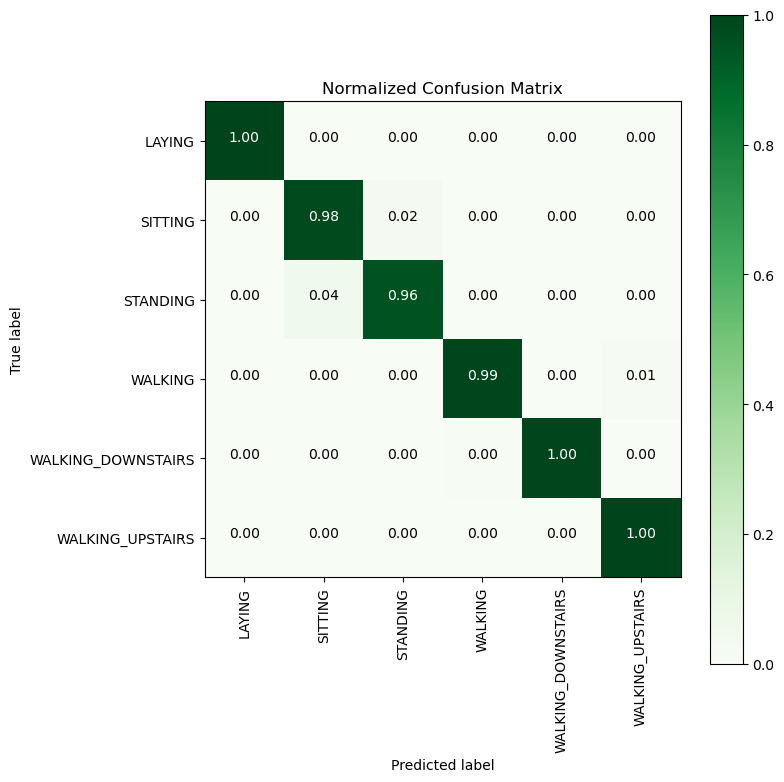

-------------------------
| Classification Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.96      0.98      0.97       262
          STANDING       0.98      0.96      0.97       276
           WALKING       1.00      0.99      0.99       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       0.99      1.00      1.00       200

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471

--------------------------
|      En İyi Tahmin      |
--------------------------

	LogisticRegression(C=1, penalty='l1', solver='liblinear')

--------------------------------
|     En iyi Hiperparametre     |
--------------------------------
	En iyi Parametre: 

	{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

----

In [76]:
# Logistic Regression için GridSearch hiperparametreleri
parameters = {'C': [0.01, 0.1, 1, 10, 20, 30,40], 'penalty': ['l2', 'l1'], 'solver': ['liblinear']}
logReg = LogisticRegression()

# GridSearchCV tanımlama
log_reg_grid = GridSearchCV(estimator=logReg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)

# GridSearchCV ile Logistic Regression çalıştırma
log_reg_grid_results = perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# GridSearch sonuçlarını yazdır
print_grid_search_attributes(log_reg_grid)


Model eğitiliyor...
Fitting 5 folds for each of 7 candidates, totalling 35 fits


/Users/mustafaince/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mustafaince/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mustafaince/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mustafaince/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mustafaince/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

Eğitim tamamlandı. 

Eğitim süresi (HH:MM:SS.ms): 0:00:27.059376

Test verisi tahmin ediliyor...
Tahmin tamamlandı. 

Test süresi (HH:MM:SS.ms): 0:00:00.019277

---------------------
|      Doğruluk      |
---------------------

    0.9864038069340585

--------------------
| Confusion Matrix |
--------------------

[[280   0   0   0   0   0]
 [  0 253   9   0   0   0]
 [  0  10 266   0   0   0]
 [  0   0   0 246   0   1]
 [  0   0   0   0 206   0]
 [  0   0   0   0   0 200]]
Normalized Confusion Matrix


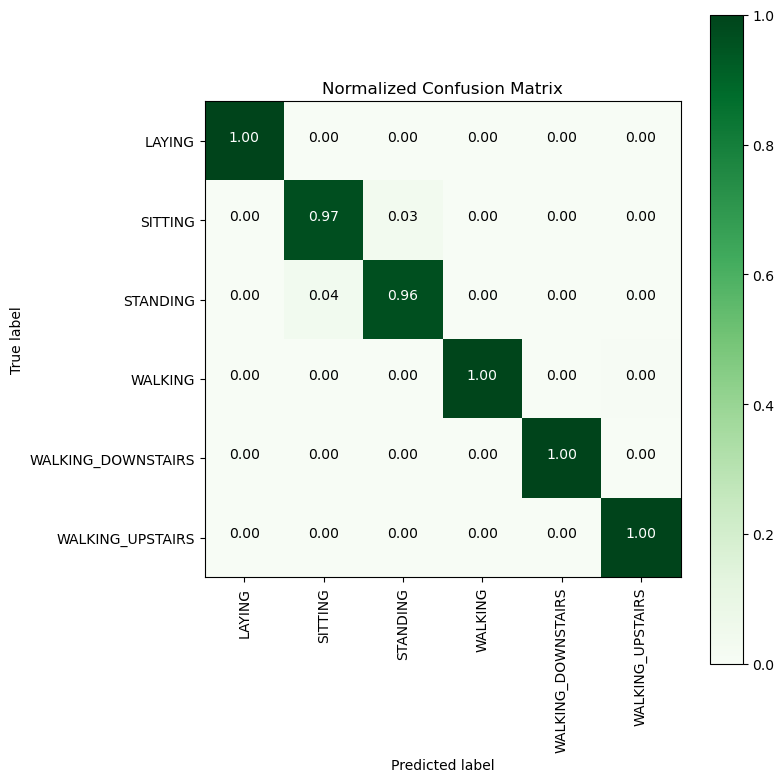

-------------------------
| Classification Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.96      0.97      0.96       262
          STANDING       0.97      0.96      0.97       276
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       1.00      1.00      1.00       200

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471



In [77]:
parameters = {'C':[0.125, 0.5, 1, 2, 8,16,32]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

Model eğitiliyor...
Eğitim tamamlandı. 

Eğitim süresi (HH:MM:SS.ms): 0:00:06.327192

Test verisi tahmin ediliyor...
Tahmin tamamlandı. 

Test süresi (HH:MM:SS.ms): 0:00:00.008095

---------------------
|      Doğruluk      |
---------------------

    0.9524133242692047

--------------------
| Confusion Matrix |
--------------------

[[280   0   0   0   0   0]
 [  0 242  20   0   0   0]
 [  0  11 265   0   0   0]
 [  0   0   0 239   0   8]
 [  0   0   0  13 185   8]
 [  0   0   0   6   4 190]]
Normalized Confusion Matrix


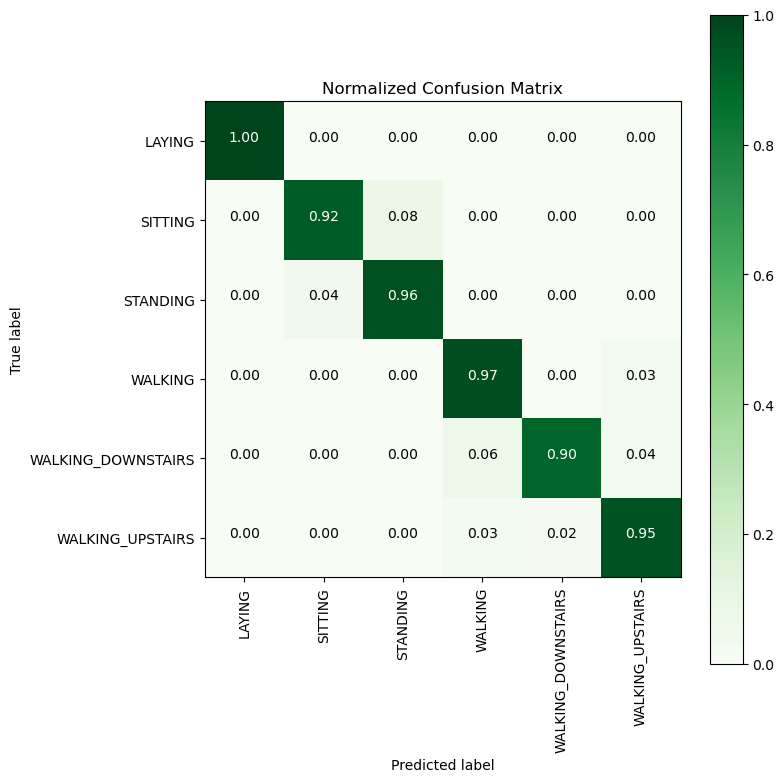

-------------------------
| Classification Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.96      0.92      0.94       262
          STANDING       0.93      0.96      0.94       276
           WALKING       0.93      0.97      0.95       247
WALKING_DOWNSTAIRS       0.98      0.90      0.94       206
  WALKING_UPSTAIRS       0.92      0.95      0.94       200

          accuracy                           0.95      1471
         macro avg       0.95      0.95      0.95      1471
      weighted avg       0.95      0.95      0.95      1471

--------------------------
|      En İyi Tahmin      |
--------------------------

	DecisionTreeClassifier(max_depth=9)

--------------------------------
|     En iyi Hiperparametre     |
--------------------------------
	En iyi Parametre: 

	{'max_depth': 9}

---------------------------------
|   Çarpaz Doğrulama Tes

In [78]:
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

Model eğitiliyor...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Eğitim tamamlandı. 

Eğitim süresi (HH:MM:SS.ms): 0:00:45.906152

Test verisi tahmin ediliyor...
Tahmin tamamlandı. 

Test süresi (HH:MM:SS.ms): 0:00:00.020992

---------------------
|      Doğruluk      |
---------------------

    0.9830047586675731

--------------------
| Confusion Matrix |
--------------------

[[280   0   0   0   0   0]
 [  0 252  10   0   0   0]
 [  0   9 267   0   0   0]
 [  0   0   0 246   0   1]
 [  0   0   0   0 202   4]
 [  0   0   0   0   1 199]]
Normalized Confusion Matrix


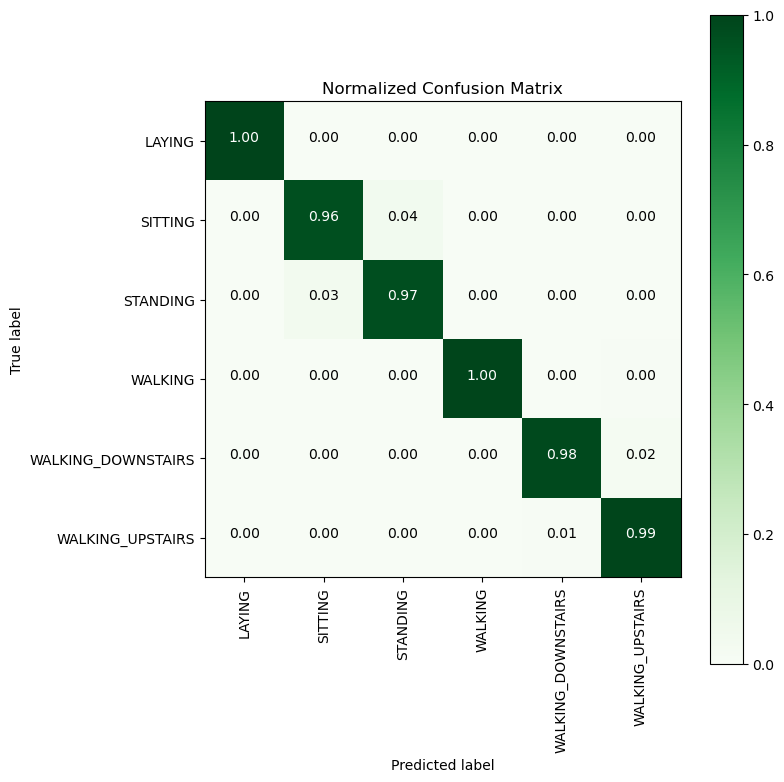

-------------------------
| Classification Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.97      0.96      0.96       262
          STANDING       0.96      0.97      0.97       276
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       1.00      0.98      0.99       206
  WALKING_UPSTAIRS       0.98      0.99      0.99       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



In [79]:
parameters = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Random Forest modeli
rf_clf = RandomForestClassifier(random_state=42)

# GridSearchCV ile optimizasyon
rf_grid = GridSearchCV(estimator=rf_clf, param_grid=parameters, n_jobs=-1, verbose=1, cv=3)
rf_grid_results = perform_model(rf_grid, X_train, y_train, X_test, y_test, class_labels=labels)


In [80]:
# Model sonuçlarını düzenli bir şekilde yazdırma
print("---------------------------------------------")
print("|   Model               | Accuracy  | Error  |")
print("| Logistic Regression   | {:>8.2f}% | {:>5.2f}% |".format(
    log_reg_grid_results['accuracy'] * 100, 100 - (log_reg_grid_results['accuracy'] * 100)))
print("| Linear SVC            | {:>8.2f}% | {:>5.2f}% |".format(
    lr_svc_grid_results['accuracy'] * 100, 100 - (lr_svc_grid_results['accuracy'] * 100)))
print("| Decision Tree         | {:>8.2f}% | {:>5.2f}% |".format(
    dt_grid_results['accuracy'] * 100, 100 - (dt_grid_results['accuracy'] * 100)))
print("| Random Forest         | {:>8.2f}% | {:>5.2f}% |".format(
    rf_grid_results['accuracy'] * 100, 100 - (rf_grid_results['accuracy'] * 100)))
print("---------------------------------------------")


---------------------------------------------
|   Model               | Accuracy  | Error  |
| Logistic Regression   |    98.57% |  1.43% |
| Linear SVC            |    98.64% |  1.36% |
| Decision Tree         |    95.24% |  4.76% |
| Random Forest         |    98.30% |  1.70% |
---------------------------------------------


In [82]:
import pandas as pd

# Logistic Regression için tahmin ve gerçek değerleri kaydediyoruz
#X_test_log_reg = X_test.copy()  Kısmında test verilerinin  bir kopyasını oluşturuyoruz hemen alttaki 3 satırda
#edilen ve gerçek sınıfları ekleyip verileri csv dosyasına kaydediyoruz bu diğer mak. ögr. algoritmaları içinde yapılıyr


log_reg_predictions = log_reg_grid_results['predicted']
X_test_log_reg = X_test.copy()  
X_test_log_reg['Predicted'] = log_reg_predictions  
X_test_log_reg['Actual'] = y_test  
X_test_log_reg.to_csv('logistic_regression_predictions.csv', index=False) 
print("'logistic_regression_predictions.csv' kaydedildi.")

lr_svc_predictions = lr_svc_grid_results['predicted']
X_test_lr_svc = X_test.copy()  
X_test_lr_svc['Predicted'] = lr_svc_predictions  
X_test_lr_svc['Actual'] = y_test  
X_test_lr_svc.to_csv('linear_svc_predictions.csv', index=False)  
print("'linear_svc_predictions.csv' kaydedildi.")

dt_predictions = dt_grid_results['predicted']
X_test_dt = X_test.copy()  
X_test_dt['Predicted'] = dt_predictions  
X_test_dt['Actual'] = y_test  
X_test_dt.to_csv('decision_tree_predictions.csv', index=False)  
print("'decision_tree_predictions.csv' kaydedildi.")

rf_predictions = rf_grid_results['predicted']
X_test_rf = X_test.copy()  
X_test_rf['Predicted'] = rf_predictions  
X_test_rf['Actual'] = y_test  
X_test_rf.to_csv('random_forest_predictions.csv', index=False)  
print("'random_forest_predictions.csv' kaydedildi.")


'logistic_regression_predictions.csv' kaydedildi.
'linear_svc_predictions.csv' kaydedildi.
'decision_tree_predictions.csv' kaydedildi.
'random_forest_predictions.csv' kaydedildi.
